<a href="https://colab.research.google.com/github/kyleegit27/linearModels/blob/main/linear_models_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/ds4e/linearModels

Cloning into 'linearModels'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 43 (delta 9), reused 5 (delta 5), pack-reused 27 (from 1)
Receiving objects: 100% (43/43), 3.60 MiB | 10.01 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
#building feature space for cars data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
cars = pd.read_csv("/content/USA_cars_datasets.csv")
cars0 = cars

In [8]:
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,price_t
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,9.441452
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,8.665268
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,9.277999
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,10.819778
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,10.922335


In [19]:
cars['year'].dtype

dtype('int64')

In [6]:
#dummy variables

y = cars['price']
X_d = pd.get_dummies(cars['brand'], dtype = 'int')

#regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = False).fit(X_d, y) #fitting the model
results = pd.DataFrame({'Variable': reg.feature_names_in_, "coefficient": reg.coef_})
print("R-squared: ", reg.score(X_d, y))
results

R-squared:  0.12030739559992254


,Variable,coefficient
0,acura,7266.666667
1,audi,13981.250000
2,bmw,26397.058824
3,buick,19715.769231
4,cadillac,24941.000000
5,chevrolet,18669.952862
6,chrysler,13686.111111
7,dodge,17781.988426
8,ford,21666.888259
9,gmc,10657.380952


In [27]:
#convert year to age
cars['age'] = max(cars['year'])-cars['year']
cars['age'].describe()

,age
count,2499.000000
mean,3.285714
std,3.442656
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,47.000000


<Axes: xlabel='mileage_t', ylabel='price_t'>

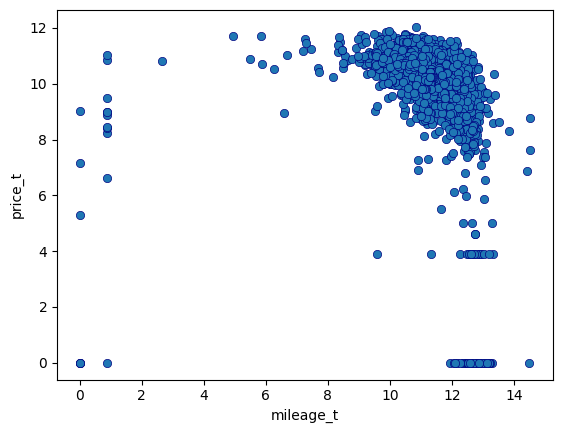

In [28]:
#take transformation to rescale vars
cars['price_t'] = np.arcsinh(cars['price'])
cars['mileage_t'] = np.arcsinh(cars['mileage'])
cars['age_t'] = np.arcsinh(cars['age'])
sns.scatterplot(data = cars, y = 'price_t', x= 'mileage_t', edgecolor = 'navy')

In [11]:
def slr(x,y):
    """ Single linear regression function. """
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

In [12]:
#regression on brand and numeric values
#drop outliers?

y = cars['price_t'] #outcome var
x = cars['mileage_t'] #feature, covariate

reg = slr(x, y)

Text(0.5, 1.0, 'Linear Regression')

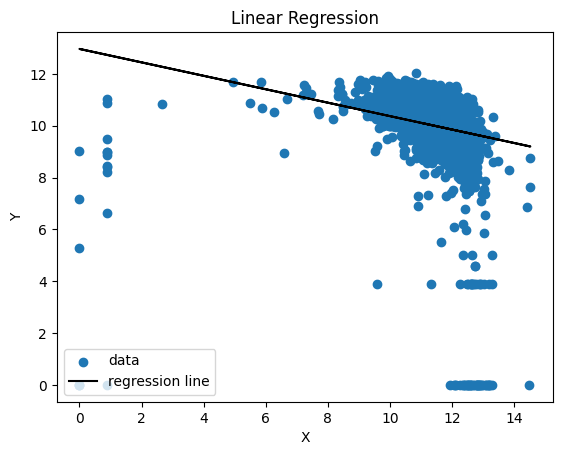

In [14]:
plt.scatter(x,y, label = 'data')
plt.plot(x, reg['y_hat'], label = 'regression line', color= 'black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc = "lower left")
plt.title("Linear Regression")

<Axes: >

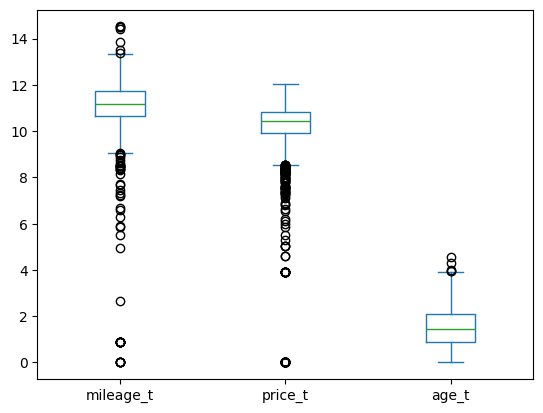

In [29]:
#more regression

#first boxplot
cars.loc[:, ['mileage_t', 'price_t', 'age_t']].plot.box()



In [30]:
#winsorize def

def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Winsorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

<Axes: >

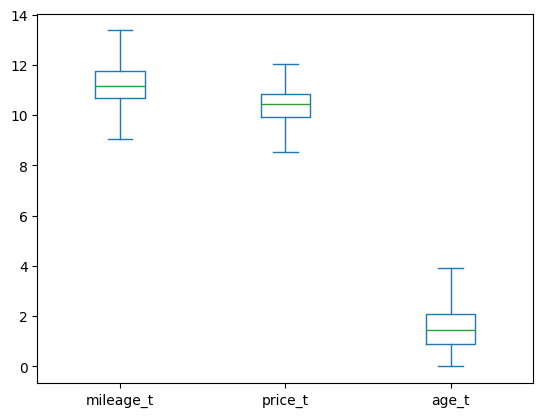

In [32]:
#winsorize with .apply()

cars.loc[:, ['mileage_t', 'price_t', 'age_t']] = cars.loc[:, ['mileage_t', 'price_t', 'age_t']].apply(winsorize)

#second boxplot
cars.loc[:, ['mileage_t', 'price_t', 'age_t']].plot.box()

In [37]:
#expand numeric vars

from sklearn.preprocessing import PolynomialFeatures
expander = PolynomialFeatures(degree = 1, include_bias = False)
X_num = cars.loc[:, ['mileage_t']]
Z = expander.fit_transform(X_num) #gets powers and interactions of explanatory variables
names = expander.get_feature_names_out()
X_num = pd.DataFrame(data = Z, columns = names) #new expanded data frame

#concatenate
X = pd.concat([X_num, X_d], axis = 1)

X.head()

,mileage_t,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,...,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram,toyota
0,13.214457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12.850828,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,11.279479,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11.762064,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9.496121,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept = False).fit(X, y ) #fitting linear model

results = pd.DataFrame({'Variable ': reg.feature_names_in_, "coefficient ": reg.coef_})

print('R-squared:', reg.score(X, y))
results

R-squared: 0.24533788698813275


,Variable,coefficient
0,mileage_t,-0.839795
1,acura,19.330985
2,audi,16.671046
3,bmw,19.372378
4,buick,19.028630
5,cadillac,19.148019
6,chevrolet,19.365188
7,chrysler,19.116807
8,dodge,19.562669
9,ford,19.663629


<Axes: xlabel='price_t', ylabel='Density'>

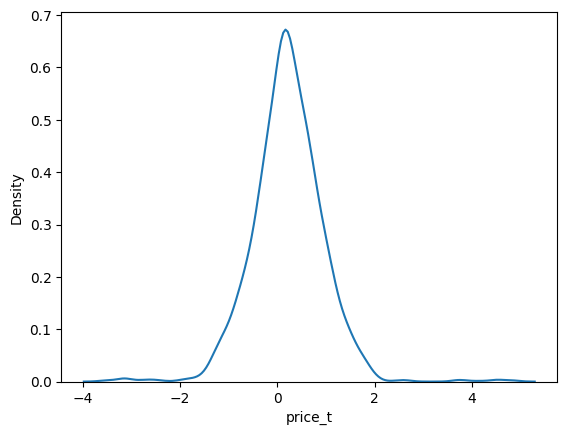

In [41]:
sns.kdeplot(cars['price_t'] - reg.predict(X)) #residual plot


In [47]:
#for comparision
cars0['age'] = max(cars0['year'])-cars0['year']

cars0['mileage_t'] = np.arcsinh(cars0['mileage'])

cars0['price_t'] = np.arcsinh(cars0['price'])

cars0['age_t'] = np.arcsinh(cars0['age'])

In [48]:
from sklearn.linear_model import LinearRegression # Import linear regression model
cars = cars0 # Let's start over, again
cars.loc[:, ['mileage_t','price_t','age_t'] ] = cars.loc[:,['mileage_t','price_t','age_t'] ].apply(winsorize)
y = cars['price_t'] # Target variable
cars['mileage_t X age_t'] = cars['mileage_t']*cars['age_t'] # Interaction term

X_n = cars.loc[:,['mileage_t','age_t', 'mileage_t X age_t']]

X = X_n
reg = LinearRegression(fit_intercept=True).fit(X, y) # Fit the linear model
print('Rsq: ', reg.score(X,y) )

Rsq:  0.37277230623231283


In [49]:
var =  'mileage_t' #'mileage_ihs X age_ihs'
x_k = X[var]
X_mk = X.drop(var,axis=1)

## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) # Fit the linear model
r_y = y - reg_y.predict(X_mk)

## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_mk)

Partial R^2:  0.9651446980981887


[Text(0.5, 1.0, 'Scatterplot of Residuals')]

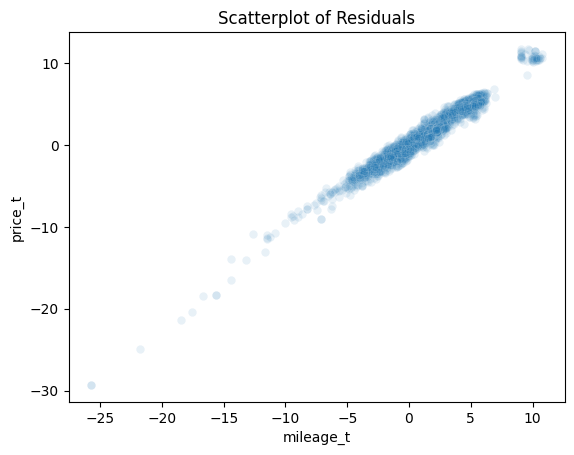

In [51]:
# Plot r_y against r_k
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )
sns.scatterplot(y=r_y, x=r_x,alpha=.1).set(title='Scatterplot of Residuals')

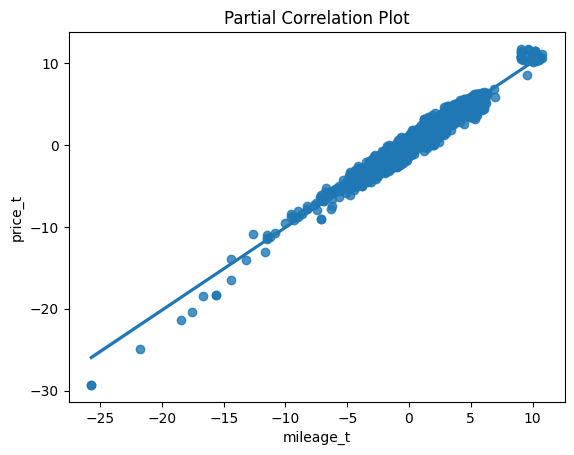

In [52]:
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')
plt.show()

[Text(0.5, 1.0, 'Original Variables')]

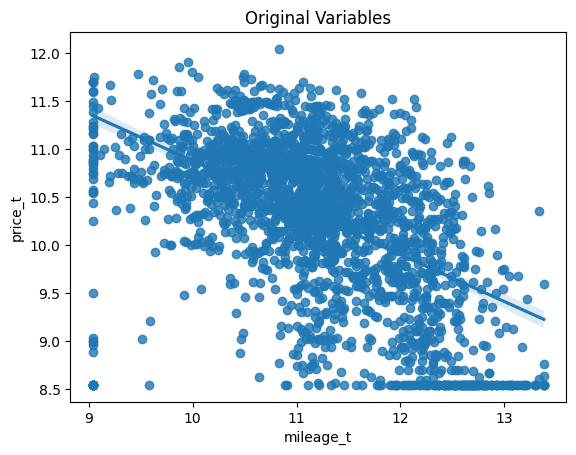

In [53]:
sns.regplot(y=cars['price_t'], x=cars[var]).set(title='Original Variables')